This part will read the file and convert each line into a dictionary. The return will be a dictionary with the key-value pair being the tut group no. and list with the dictionary that has the student's info inside that.

1. Read file
2. Convert each line into a dictionary
3. Gather the dictionary from 2. into one big list
4. Rearrange the list from 3. into a dictionary that satisfies all conditions

-----------------------------------------------------------------------------------
Pseudocode

START

OPEN file "record.csv"
READ 1 line to skip header
SET empty list called "students"

FOR line in file
	READ 1 line
	CONVERT line into dictionary that contain student's information
	APPEND dictionary into students
ENDFOR

SET empty dictionary called "groups"

FOR stu in students
	GET tutorial_group from stu
	IF tutorial_group not in groups THEN
		CREATE key: tutorial_group, value: []
	ENDIF
	APPEND stu into groups["tutorial_group"]
ENDFOR

RETURN groups

END

----------------------------------------------------------------------------------------------------------------
Flowchart
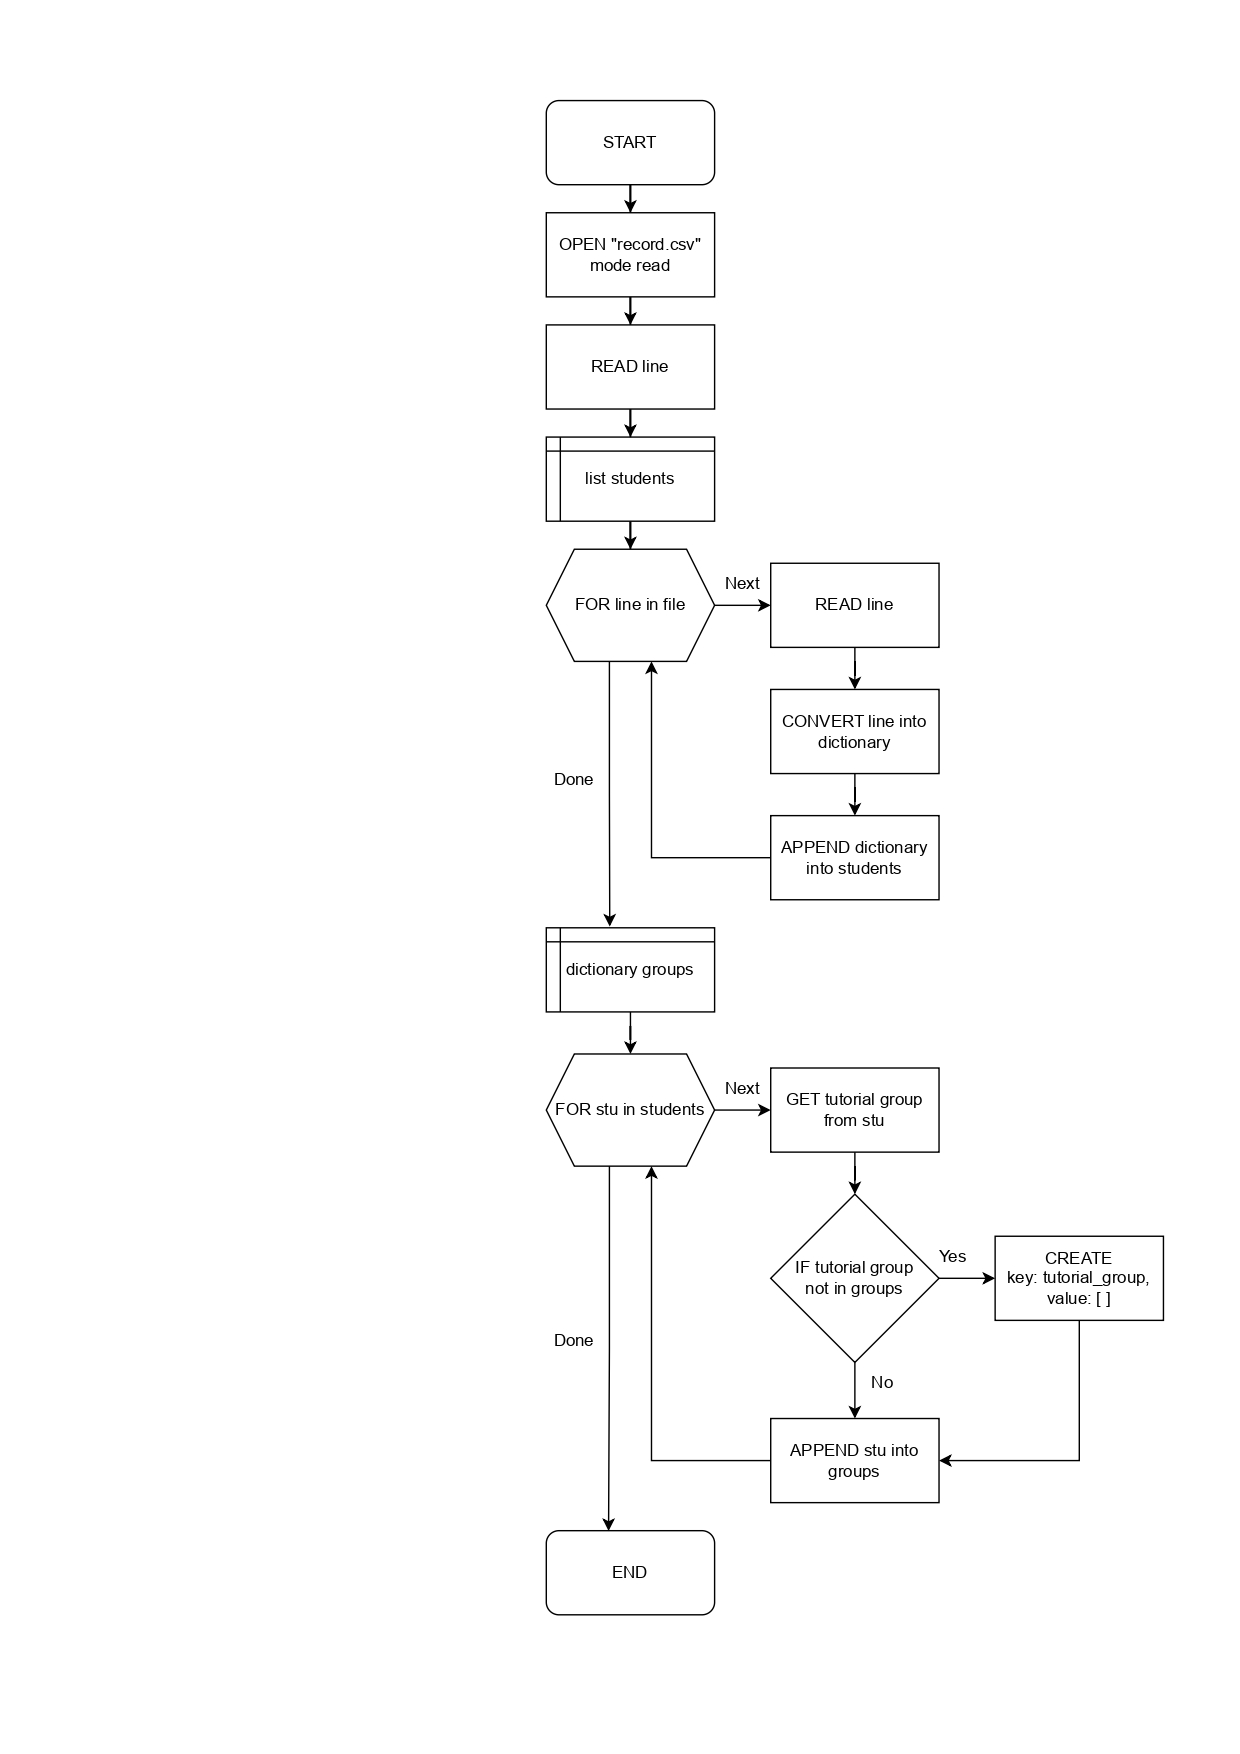

----------------------------------------------------------------------------------------------------------------

In [4]:
#Function to read the files
"""
convert each line into dictionary like:
{
     "tutorial_group": "G-1",
     "student_id": "U1234567X",
     "school": "SCSE",
     "name": "Zone",
     "gender": "M",
     "cgpa": 4.23
   }
"""
#function convert each line to dictionary
def ConvertToDict(line):
    #split line into list with ,
    lists = line.strip().split(",")

    #return dictionary
    return{
        "tutorial_group" : lists[0],
        "student_id" : lists[1],
        "school" : lists[2],
        "name" : lists[3],
        "gender" : lists[4],
        "cgpa" : float(lists[5])
    }

#function append each dictionary to 1 big list
def OneBigList(data = "records.csv"):
    #create 1 big list
    students = []

    #read each line from file
    with open(data, "r", encoding="utf-8") as file:
        #skip header
        header = file.readline().strip()

        #read each line and append to students
        for line in file:
            line = line.strip()
            students.append(ConvertToDict(line))
    return students

#function to gather same tut group in 1 dictionary with key = tut no.
def GroupByTut(students):
    #create dictionary
    groups = {}

    #d is dictionary
    for d in students:
        #assign tut no.
        tutno = d["tutorial_group"]

        #check tutno in groups
        if tutno not in groups:
            #create key in groups
            groups[tutno] = []
        
        #append data into groups(list)
        groups[tutno].append(d)

    #return big dictionary
    return groups

#comebine functions
def readfile():
    students = OneBigList("records.csv")
    groups = GroupByTut(students)
    return groups

## Data Analysis

### General Flowchart

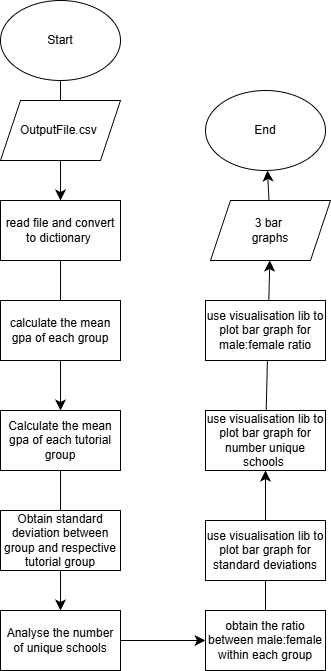

### Read File function

#### functionality: Read and Convert file into dictionary
**input**: csv file
* Iterate through the lines
* add values to keys in dictionary via index



**output**: 


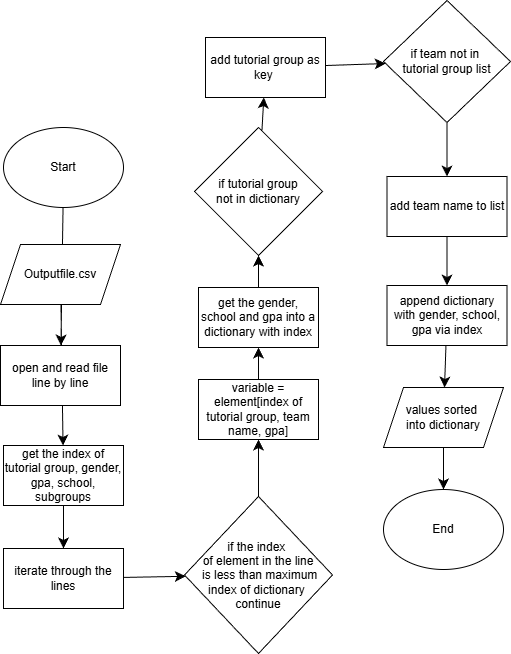

In [ ]:
def load_and_group_data(file_path):
   
    print(f"--- Loading data from {file_path} ---")

    try:
        with open(file_path, mode='r', newline='', encoding='utf-8') as file:
            reader = csv.reader(file)
            header = next(reader) 

            
            col_index = {
                'Tutorial Group': header.index('Tutorial Group'),
                'Gender': header.index('Gender'),
                'CGPA': header.index('CGPA'),
                'School': header.index('School'),
                'Subgroups': header.index('Subgroups'),
            }

            for row in reader:
               
                if len(row) <= max(col_index.values()): continue

                tut_grp_name = row[col_index['Tutorial Group']]
                team_name = row[col_index['Subgroups']]
                cgpa_str = row[col_index['CGPA']]

                try:
                    cgpa = float(cgpa_str)
                except ValueError:
                    continue 

                student_data = {
                    'gender': row[col_index['Gender']],
                    'school': row[col_index['School']],
                    'cgpa': cgpa
                }

               
                if tut_grp_name not in tut_groups_map:
                    tut_groups_map[tut_grp_name] = {}
                if team_name not in tut_groups_map[tut_grp_name]:
                    tut_groups_map[tut_grp_name][team_name] = []

                tut_groups_map[tut_grp_name][team_name].append(student_data)

            print(f"Data loaded and grouped into {len(tut_groups_map)} Tutorial Groups.")
            return True

    except Exception as e:
        print(f"An error occurred during data loading: {e}")
        return False

### Analyse School, Gender and Standard Deviation of GPA Diversity

#### functionality: analyse the gender ratio, number of unique schools and cGPA standard deviation distribution
**input**: 
* iterate through the dictionary
* count the number of males & obtain number of females
* compare the ratios of male to female
* add count to ratios (5:0, 4:!, etc.)
* use set() to obtain unique schools
* obtain the length of the unique schools
* get mean cGPA of tutorial group & each group
* get standard deviation between group & respective tutorial group
* if standard deviation correspond to a certain number, add count to that standard deviation counter 



**output**: 

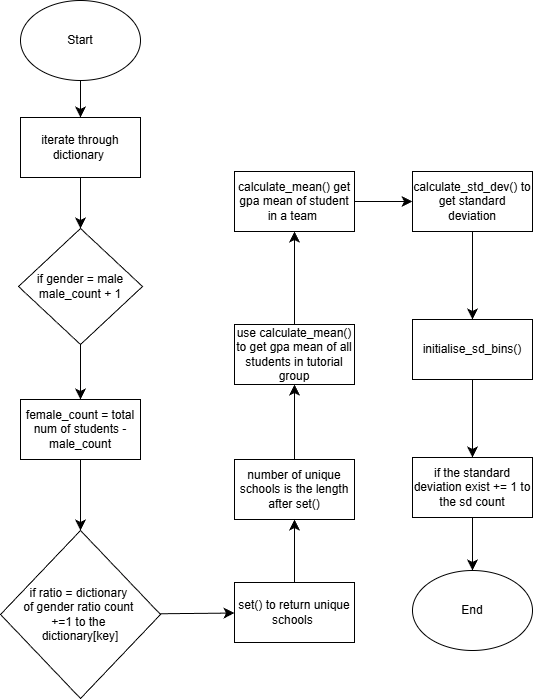

In [ ]:
def analyze_diversity_and_stats():
    print("\n--- Analyzing Diversity and CGPA Standard Deviation ---")

    all_group_sd_values = []

    for tut_grp_name, teams_in_group in tut_groups_map.items():
        
        team_cgpa_means = []
        
        if tut_grp_name not in group_stats:
             group_stats[tut_grp_name] = {
                'team_cgpa_means': [],
                'group_mean_cgpa': 0.0,
                'sd_of_team_means': 0.0
            }

      
        all_group_cgpas = []
        
        for team_name, students in teams_in_group.items():
            team_size = len(students)
            
          
            team_cgpas = [s['cgpa'] for s in students]
            team_mean_cgpa = calculate_mean(team_cgpas)
            team_cgpa_means.append(team_mean_cgpa)
            all_group_cgpas.extend(team_cgpas)

           
            if team_size == REQUIRED_TEAM_SIZE:
                male_count = sum(1 for s in students if s['gender'] == 'Male')
                female_count = team_size - male_count
                ratio_key = f'{male_count}:{female_count}'
                
                if ratio_key in gender_ratio_counts:
                    gender_ratio_counts[ratio_key] += 1
                else:
                    gender_ratio_counts['Other'] += 1
            elif team_size != 0:
                 gender_ratio_counts['Other'] += 1

            # --- 3. School Diversity Evaluation ---
            unique_schools = set(s['school'] for s in students)
            num_unique_schools = len(unique_schools)
            
            if num_unique_schools in school_diversity_counts:
                school_diversity_counts[num_unique_schools] += 1

    
        
       
        group_mean_cgpa = calculate_mean(all_group_cgpas)
        group_stats[tut_grp_name]['group_mean_cgpa'] = group_mean_cgpa

       
        if len(team_cgpa_means) >= 2:
            mean_of_team_means = calculate_mean(team_cgpa_means)
            sd_of_means = calculate_std_dev(team_cgpa_means, mean_of_team_means)
            group_stats[tut_grp_name]['sd_of_team_means'] = sd_of_means
            all_group_sd_values.append(sd_of_means)
        else:
            group_stats[tut_grp_name]['sd_of_team_means'] = 0.0

    initialize_sd_bins() 
    
    for sd_val in all_group_sd_values:
        bin_key = get_sd_bin(sd_val)
        if bin_key in sd_distribution_counts:
            sd_distribution_counts[bin_key] += 1
    


    